# HW2- Steam Reviews


# Loading the Dataset

In [1]:
'''
from google.colab import drive
drive.mount('/content/drive/')
''';

 This is a dataset of around 21 million user reviews of around 300 different games on Steam: sto importando solo poche righe per lavorarci

### Usefull libraries

In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
  



In [3]:
#df= pd.read_csv('/content/drive/MyDrive/HW2-ADM/steam_reviews.csv',nrows=10000000)


In [4]:
df=pd.read_csv('steam_reviews.csv',nrows=1000000)

# [RQ1]: Exploratory Data Analysis

In [81]:
df.head(3)

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played,updated
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,...,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09,True
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,...,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1.611386e+09,True
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,...,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1.611384e+09,True


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 23 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Unnamed: 0                      1000000 non-null  int64  
 1   app_id                          1000000 non-null  int64  
 2   app_name                        1000000 non-null  object 
 3   review_id                       1000000 non-null  int64  
 4   language                        1000000 non-null  object 
 5   review                          998242 non-null   object 
 6   timestamp_created               1000000 non-null  int64  
 7   timestamp_updated               1000000 non-null  int64  
 8   recommended                     1000000 non-null  bool   
 9   votes_helpful                   1000000 non-null  int64  
 10  votes_funny                     1000000 non-null  int64  
 11  weighted_vote_score             1000000 non-null  float64
 12  c

We can see that there are 23 columns, 8 integer,5 decimal, 4 boolean and 6 of other type.
The first one 'Unnamed' can be consider just like an index.


In [7]:
df.isnull().sum()

Unnamed: 0                           0
app_id                               0
app_name                             0
review_id                            0
language                             0
review                            1758
timestamp_created                    0
timestamp_updated                    0
recommended                          0
votes_helpful                        0
votes_funny                          0
weighted_vote_score                  0
comment_count                        0
steam_purchase                       0
received_for_free                    0
written_during_early_access          0
author.steamid                       0
author.num_games_owned               0
author.num_reviews                   0
author.playtime_forever              0
author.playtime_last_two_weeks       0
author.playtime_at_review         2314
author.last_played                   0
dtype: int64

It appears that the variables with missing values ​​are: 'review' (which contains the text itself) , 'author.playtime_at_review' (Author playtime of reviewed app at time of review) ,   .

In [8]:
df.describe()

,Unnamed: 0,app_id,review_id,timestamp_created,timestamp_updated,votes_helpful,votes_funny,weighted_vote_score,comment_count,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
count,1000000.000000,1000000.000000,1.000000e+06,1.000000e+06,1.000000e+06,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,9.976860e+05,1.000000e+06
mean,500000.028543,137653.276540,5.024635e+07,1.536537e+09,1.540020e+09,1.354286,1.374396e+05,0.140014,0.110916,7.656120e+16,128.462811,11.763607,1.019143e+04,83.725445,6.910500e+03,1.568400e+09
std,288675.710534,145203.141254,2.332212e+07,6.952888e+07,6.781931e+07,23.474932,2.429563e+07,0.232354,1.493333,3.292959e+08,267.229146,38.393893,3.265229e+04,548.635872,2.486934e+04,8.532309e+07
min,0.000000,70.000000,4.300000e+01,1.290320e+09,1.290320e+09,0.000000,0.000000e+00,0.000000,0.000000,7.656120e+16,0.000000,1.000000,0.000000e+00,0.000000,1.000000e+00,0.000000e+00
25%,249999.750000,620.000000,3.044572e+07,1.489235e+09,1.498630e+09,0.000000,0.000000e+00,0.000000,0.000000,7.656120e+16,26.000000,2.000000,9.640000e+02,0.000000,5.130000e+02,1.560865e+09
50%,500000.500000,4000.000000,5.347887e+07,1.562225e+09,1.568311e+09,0.000000,0.000000e+00,0.000000,0.000000,7.656120e+16,63.000000,5.000000,3.465000e+03,0.000000,1.640000e+03,1.592154e+09
75%,750000.250000,292030.000000,7.114404e+07,1.592769e+09,1.593889e+09,1.000000,0.000000e+00,0.467978,0.000000,7.656120e+16,140.000000,11.000000,9.257000e+03,0.000000,5.634000e+03,1.607051e+09
max,1000000.000000,292030.000000,8.521823e+07,1.611425e+09,1.611425e+09,7352.000000,4.294967e+09,0.990385,420.000000,7.656120e+16,20969.000000,5236.000000,3.336152e+06,20924.000000,3.062784e+06,1.611429e+09


In [9]:
import seaborn as sns

<AxesSubplot:>

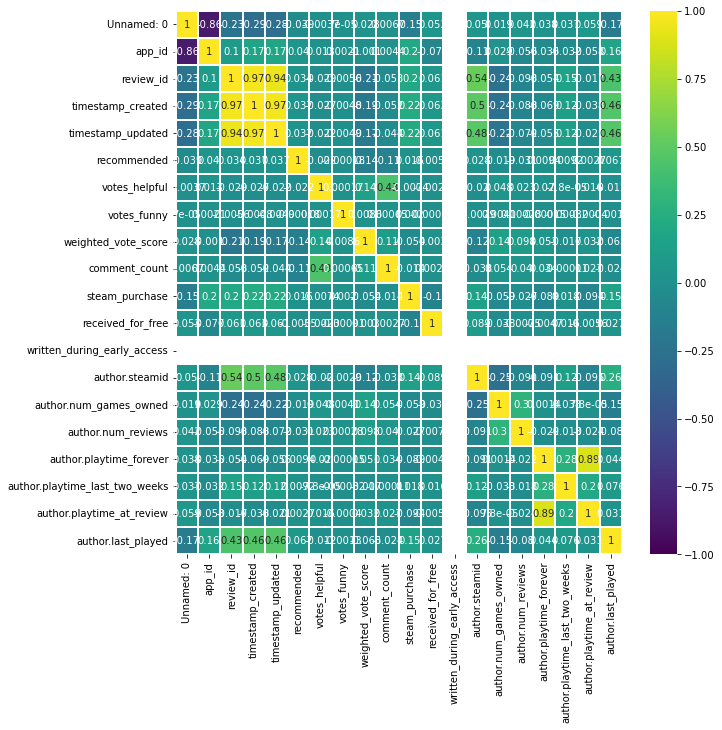

In [10]:
#seaborn.heatmap(df)
df_kor = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(df_kor, vmin=-1, vmax=1, cmap="viridis", annot=True, linewidth=0.1)



Now let's focus on the variables that we consider more interesting. We start with app_name.

The Witcher 3: Wild Hunt    0.469395
Portal 2                    0.232329
Counter-Strike: Source      0.118081
Garry's Mod                 0.092374
Half-Life                   0.057320
Half-Life 2: Episode Two    0.023500
X Rebirth                   0.007001
Name: app_name, dtype: float64
['The Witcher 3: Wild Hunt' 'Half-Life' 'Counter-Strike: Source'
 'Half-Life 2: Episode Two' 'Portal 2' 'X Rebirth' "Garry's Mod"]


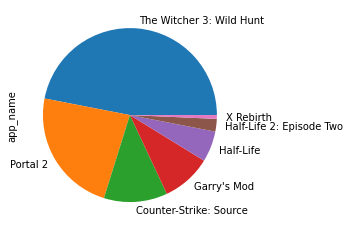

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

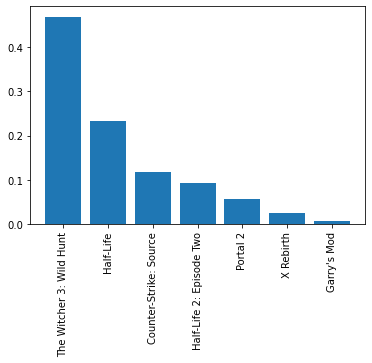

In [11]:
#App_name
x=df["app_name"].value_counts(normalize=True) #in percentuale le diverse app recensite
print(x)
names=df["app_name"].unique() #nomi app
print(names)
label=["Tom Clancy's Rainbow Six Siege","Garry's Mod","Rust" ]

#x_1=x[:3:]
#print(x_1)

#Grafico a torta
x.plot.pie() #labels=label)
plt.show()

#Farei un barpot con quelle "vere"
plt.bar(names,x)
plt.xticks(rotation='vertical')

In total there are 315 different apps, the most common are: PLAYERUNKNOWN'S BATTLEGROUNDS (8%),Grand Theft Auto V (5%) and.. (bo va visto sui dati tot).


Now we consider the language. The most common are...

english       0.392312
russian       0.185744
schinese      0.125667
brazilian     0.045571
turkish       0.044407
spanish       0.042013
polish        0.031777
german        0.031066
french        0.026499
koreana       0.021153
tchinese      0.008131
czech         0.007633
italian       0.005737
portuguese    0.004249
latam         0.004034
hungarian     0.003403
thai          0.003148
swedish       0.002676
finnish       0.002522
danish        0.002352
dutch         0.002335
japanese      0.002113
ukrainian     0.001820
norwegian     0.001185
romanian      0.001068
greek         0.000598
bulgarian     0.000481
vietnamese    0.000306
Name: language, dtype: float64


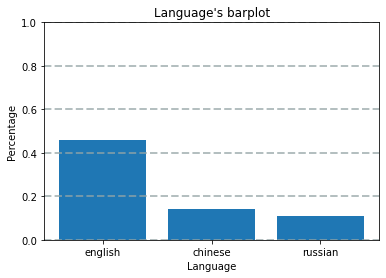

(array([27.5, 27.6, 27.7, 27.8, 27.9, 28. , 28.1, 28.2, 28.3, 28.4, 28.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

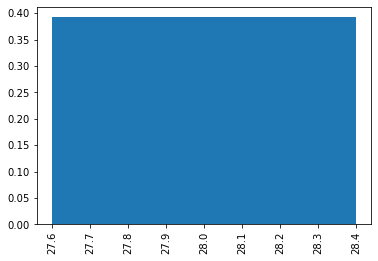

In [22]:
print(df["language"].value_counts(normalize=True))
data=[0.46,0.14,0.11]
labels = ['english', 'chinese', 'russian']
plt.xticks([1,2,3], labels)
plt.xlabel('Language')
plt.ylabel('Percentage')
plt.title("Language's barplot")
plt.bar([1,2,3], data)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.ylim(0.0,1)
plt.show()



Recommended and steam_purchase 
We observe that 92% of review authors recommend the app and 78% of them purchased the app on Steam. But only 72% of the authors give a positive opinion and then actually buy the app.

In [13]:
print(df["recommended"].value_counts(normalize=True))

print(df["steam_purchase"].value_counts(normalize=True))

len(df[  (df.recommended == True) &(df.steam_purchase == True)  ])/ 10000000

True     0.973726
False    0.026274
Name: recommended, dtype: float64
True     0.835481
False    0.164519
Name: steam_purchase, dtype: float64


0.0814488


author.num_reviews :Number of lifetime app reviews by author
Con i dati veri si può fare un commento.


In [14]:
print(df["author.num_reviews"].describe())


count    1000000.000000
mean          11.763607
std           38.393893
min            1.000000
25%            2.000000
50%            5.000000
75%           11.000000
max         5236.000000
Name: author.num_reviews, dtype: float64


# RQ2: Let's explore the dataset by finding simple insights into the reviews.

### Plot the number of reviews for each application in descending order.

In [15]:
new = df[['app_name']]
a=new["app_name"].value_counts()
app_sort=a.sort_values(ascending=False) #lo salvo perchè serve dopo
app_sort

The Witcher 3: Wild Hunt    469395
Portal 2                    232329
Counter-Strike: Source      118081
Garry's Mod                  92374
Half-Life                    57320
Half-Life 2: Episode Two     23500
X Rebirth                     7001
Name: app_name, dtype: int64

### What applications have the best Weighted Vote Score?

In [16]:
#In this way  the apps are sorted by  the score and then we can consider the top 5/10 (is up to us).
new_1 = df[['app_name','weighted_vote_score'  ]]
new_1.sort_values(by='weighted_vote_score',ascending=False)
#In this way I compute the average score for each app
new_1.groupby('app_name').agg({"weighted_vote_score":"mean"})
#LO lascerei svolto in entrambi i modi, come dicono su slack. Non gredo che agg (aggregate) sia necessario ma non sapevo  farlo senza. Non faccio i commenti perchè tanto i risultati finali saranno diversi.

,weighted_vote_score
app_name,
Counter-Strike: Source,0.182693
Garry's Mod,0.074021
Half-Life,0.162398
Half-Life 2: Episode Two,0.172643
Portal 2,0.128700
The Witcher 3: Wild Hunt,0.139911
X Rebirth,0.380447


### Which applications have the most and the least recommendations?

In [26]:

y=df.groupby('app_name').agg({"recommended":"sum"})
#print(y)

y=y.sort_values(by="recommended",ascending=False)
#print('the most recommended application is ...... with a total number of recommendations of .....', )
y[0:5] #most
#print('the worst recommended application is ..... with a total number of recommendations of ....', )
#y[-1:] #least


,recommended
app_name,
The Witcher 3: Wild Hunt,460252
Portal 2,229470
Counter-Strike: Source,113430
Garry's Mod,89588
Half-Life,55312


### How many of these applications were purchased, and how many were given for free?

In [18]:

print(df["steam_purchase"].value_counts(normalize=True))
print(df["received_for_free"].value_counts(normalize=True))
#Steam purchased: True se l'autore ha comprato l'app su Steam
#Received for free: True se ha ricevuto l'app gratis.
#non so bene quale vuole, per me il secondo ma boo

True     0.835481
False    0.164519
Name: steam_purchase, dtype: float64
False    0.975034
True     0.024966
Name: received_for_free, dtype: float64


# RQ3: Now it's important to understand the preferred time to do reviews.




### Request 1


I'll use the already loaded-in-memory dataset (in the variable df) in order to map every timestamp_created entry from the Datetime format, to a tuple made by the integer value of hour and minutes, once it's done i'll use the obtained column to group by the mapped rows counting the occourrence of every distinct row, i've subsequently used that pd.Series in order to extract the couple (hour, minutes) that maximizes the number of rows, so the number of reviews made in that hour range

The results are printed with a formatted string

In [19]:
from datetime import datetime
# df = read_csv_with_time(fname, ['timestamp_created'], n_rows=10e6, usecols=['timestamp_created'])

# Converting the timestamps in tuples made by hours and minutes
timed = df.timestamp_created.apply(lambda x: (x.hour, x.minute))
# grouping by values (the tuples of above) and counting the occourrences
timed = timed.groupby(timed).count() 
amax = timed.argmax() # Getting the index of the maximum value

# Retrievieng the answers and formatting them...
hh, mm = timed.index[amax]
n_rev = timed.values[amax]
hh = "{:0>2d}".format(hh)
mm = "{:0>2d}".format(mm)

print(f"The most common hour in wich are published the greater part of the reviews is at {hh}:{mm} with {n_rev} reviews published")

AttributeError: 'int' object has no attribute 'hour'

### Request 2

The function required is the following and returns a pd.Series where the index are the index of the corresponding hour range and the values are the number of reviews made in that range

In [ ]:
def new_bis(ranges, ds=fname, n_rows=1e6):
    df = read_csv_with_time(ds, ['timestamp_created'], n_rows, usecols=['timestamp_created'])
    ranges_int = get_integer_ranges(ranges)
    ranged = df.timestamp_created.apply(lambda x: get_integer_range_index((x.hour, x.minute, x.second), ranges_int))
    ranged = ranged.groupby(ranged).count()
    return ranged

### Request 3

I've used the function above in order to plot by an horizontal bar chart, the number of reviews made for every hour range of the default ranges shown in the table above

In [ ]:
ret = new_bis(def_ranges, n_rows=30e6)
plt.figure(figsize=(20,10))
ax = ret.plot(kind="barh", color='green')
ax.set_title("Reviews per hour ranges")
ax.set_ylabel("hour ranges")
ax.set_xlabel("Num of reviews")
ax.set_yticklabels(def_ranges)
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)

In [ ]:
#previous code
import pandas as pd
'''


def read_csv_with_time(path, time_fields, n_rows):
    return pd.read_csv(path, header='infer', nrows=n_rows, 
        parse_dates= [tf for tf in time_fields], date_parser=lambda x: pd.to_datetime(x, unit='s'))

def hour_in_range(str_hour, range_hour):
    min_hour, max_hour = range_hour
    return (hour_comparator(str_hour, min_hour) * hour_comparator(max_hour, str_hour)) >=0

def hour_comparator(str_h1, str_h2):
    
        #Compares two string in the format HH:MM:SS and returns:
        #    -1 if the first is less then the second
        #     0  if the dates are the same
        #    1 if the first is greater than the second
    
    hh1, mm1, ss1 = map(int,str_h1.split(':'))
    hh2, mm2, ss2 = map(int, str_h2.split(':'))
    deltas = [hh1-hh2, mm1-mm2, ss1-ss2]
    for d in deltas:
        if d>0:
            return 1
        elif d < 0:
            return -1
    return 0

def get_range_index(str_hour, ranges):
    for i in range(len(ranges)):
        if hour_in_range(str_hour, ranges[i]):
            return i
    return -1

def transform_in_hour_ranges(df, column, ranges):
    df[column]=df[column].apply(lambda x: get_range_index(x.strftime('%H:%M:%S'), ranges))
    return df

fname = '/content/drive/MyDrive/HW2-ADM/steam_reviews.csv'
ts_created = 'timestamp_created'

def_ranges = [('06:00:00', '10:59:59'),
('11:00:00', '13:59:59'),
('14:00:00', '16:59:59'),
('17:00:00', '19:59:59'),
('20:00:00', '23:59:59'),
('00:00:00', '02:59:59'),
('03:00:00', '05:59:59')]

df = transform_in_hour_ranges(read_csv_with_time(fname, [ts_created], 1000000), ts_created, def_ranges)

import matplotlib.pyplot as plt
import numpy as np
labels = ['pippo' for df in def_ranges]
plt.xticks(list(range(len(labels))), labels)
#plt.setxticks
df.groupby(df.timestamp_created).review_id.count().plot.bar()
''';

# RQ4 As Steam is a worldwide platform, the reviews can be done in many languages. Let's extract some information about it.

### What are the top 3 languages used to review applications?

In [34]:
lingue=df["language"].value_counts(normalize=True)
top=lingue[:3]
top_list=list(top.index)
print(*(x for x in top_list), sep='\n')
#top five

english
russian
schinese


### Create a function that receives as parameters both the name of a data set and a list of languages’ names and returns a data frame filtered only with the reviews written in the provided languages.

In [28]:

def filter_language(dataset, languages,col_name):
  return dataset.loc[dataset[col_name].isin(languages)]


### Use the function created in the previous literal to find what percentage of these reviews (associated with the the top 3 languages) were voted as funny?

In [37]:
for i in top_list:
     print(i+"   "+str(round(sum((df['votes_funny']==0) & (df['language']==i))/sum(df['language']==i),2))+"%")


english   0.91%
russian   0.88%
schinese   0.9%


### Use the function created in the literal “a” to find what percentage of these reviews (associated with the top 3 languages) were voted as helpful?

In [38]:
df_1= filter_language(df,top_list,'language') #dati filtrati
for i in top_list:
  print(i+"   "+str(round(sum((df['votes_helpful']!=0) & (df['language']==i))/sum(df['language']==i),2))+"%")

english   0.25%
russian   0.31%
schinese   0.23%


# RQ5 The reviews' authors are users from the game that provide their opinion on it. Now you can check how often they make reviews.

### Plot the top 10 most popular reviewers and the number of reviews.

<AxesSubplot:xlabel='author.steamid'>

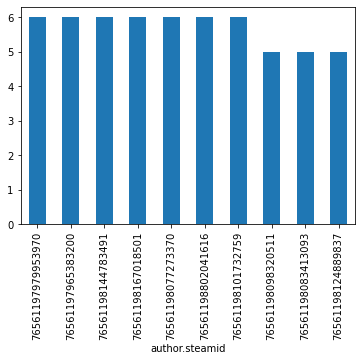

In [39]:
#df= pd.read_csv('/content/drive/MyDrive/HW2-ADM/steam_reviews.csv',nrows=10000000)
df_auth = df.groupby('author.steamid').review_id.count().sort_values(ascending=False)
df_auth[:10].plot.bar()

### What applications did the most popular author review? 

In [40]:
from_bigger_reviewer = df[df['author.steamid'] == df_auth[:1].index[0]]


In [41]:
from_bigger_reviewer['app_name']

453639    The Witcher 3: Wild Hunt
525240                   Half-Life
536595      Counter-Strike: Source
648354    Half-Life 2: Episode Two
707753                    Portal 2
981105                 Garry's Mod
Name: app_name, dtype: object

### How many applications did he purchase, and how many did he get as free? Provide the number (count) and the percentage.

In [44]:
free = from_bigger_reviewer[from_bigger_reviewer.received_for_free]
n_free = len(free)
purchased = from_bigger_reviewer[from_bigger_reviewer.steam_purchase]
n_purch = len(purchased)
tot = len(from_bigger_reviewer)
print(f"He got for free {n_free} applications ({n_free/tot*100}%) and purchased {n_purch} ({n_purch/tot*100}%) on total of {tot}")
print('   ')
print(f"The author's recommended {len(free['recommended'])} and doesn't recommended {n_free-len(free['recommended'])} application from the ones received for free")


He got for free 0 applications (0.0%) and purchased 4 (66.66666666666666%) on total of 6
   
The author's recommended 0 and doesn't recommended 0 application from the ones received for free


### How many of the applications he purchased reviewed positively, and how many negatively? How about the applications he received for free?

In [46]:
print('   ')
print(f" recommended {len(purchased['recommended'])} and doesn't recommended {n_purch-len(purchased['recommended'])} application from the ones purchased")

   
 recommended 4 and doesn't recommended 0 application from the ones purchased


# [RQ6] It's time to get information from the updates that a user does to his reviews.

### What is the average time (days and minutes) a user lets pass before he updates a review?

In [49]:
print(f"The average time that pass between the creation and the update of the reviews is: {(df.timestamp_updated - df.timestamp_created).mean(numeric_only=False)}")


The average time that pass between the creation and the update of the reviews is: 3483076.368496


### Plot the top 3 authors that usually update their reviews.

In [50]:
df['updated'] = df.timestamp_created == df.timestamp_updated
grouped = df.groupby(df['author.steamid']).updated.sum().sort_values(ascending=False)
auth = grouped[:3].index
print("The authors that has updated their reviews more often are, in order:")
for a in auth:
  print(f"\t*{a} with {grouped[a]} updated reviews")

The authors that has updated their reviews more often are, in order:
	*76561198802041616 with 6 updated reviews
	*76561198410627959 with 5 updated reviews
	*76561198442852539 with 5 updated reviews


# RQ7 Of course, calculating probabilities is a job that any Data Scientist must know. Let's compute Some interesting figures.

### What’s the probability that a review has a Weighted Vote Score equal to or bigger than 0.5?

In [51]:
#Prob = fav. cases / possible cases
p1=sum(df['weighted_vote_score']> 0.5)/df.shape[0]


### What’s the probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5?

In [52]:
#prob condizionata

intersezione=sum((df['weighted_vote_score']> 0.5)& (df['votes_funny']!=0))/df.shape[0]
p2=intersezione/p1
p2

0.20981327915595943

### Is the probability that “a review has at least one vote as funny” independent of the “probability that a review has a Weighted Vote Score equal or bigger than 0.5”?

In [53]:
pa= sum(df['votes_funny']!=0)/df.shape[0]
pa*p1==intersezione
#False, quindi Non sono indipendenti

False

# RQ8 Every decision you take in a data-based environment should be reinforced with charts, statistical tests and analysis methods to check if a hypothesis is correct or not.

### Is there a significant difference in the Weighted Vote Score of reviews made in Chinese vs the ones made in Russian? Use an appropriate statistical test or technique and support your choicv1

In [54]:
'''

v1=df.loc[df['language'] == 'russian', 'weighted_vote_score']
v2=df.loc[df['language'] == 'chinese', 'weighted_vote_score']

#!pip3 install  researchpy
#import scipy.stats as stats

#stats.ttest_ind(df['weighted_vote_score'][df['language'] == 'russian'],
                #df['weighted_vote_score'][df['language'] == 'chinese'])
stats.ttest_ind(v1,v2)
''';


In [55]:
#Is there a significant difference in the Weighted Vote Score of reviews made in Chinese vs the ones made in Russian? Use an appropriate statistical test or technique and support your choicv1
s1=df['weighted_vote_score'][df['language'] == 'russian']
s2=df['weighted_vote_score'][df['language'] == 'schinese']
s1.describe()
s2.describe()
#sono abbastanza diverse!

count    125667.000000
mean          0.118603
std           0.223421
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           0.990385
Name: weighted_vote_score, dtype: float64

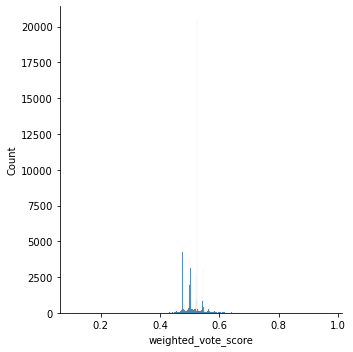

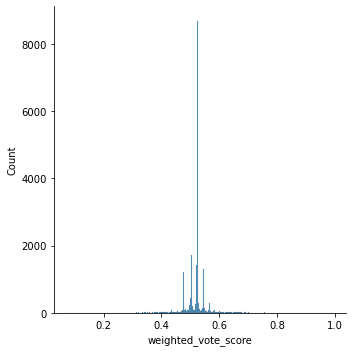

In [56]:
#grafici per far vedere che non vale la normalità se teniamo gli zeri.
import seaborn as sns 

z1= s1[s1!=0]
z2= s2[s2!=0]
z2
sns.displot(z1)

sns.displot(z2)

In [57]:
#Prendiamo gli zeri: la parte discreta
zero_1= s1[s1==0]
zero_2=s2[s2==0]

#booo

In [68]:
from scipy import stats

In [69]:
#this is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. 
#Test per la aprte continua
stats.ttest_ind(z1,z2)
#There is a statistically significant difference in the average score between english and chinese, t= -69, p= 0.00.
 #If the p-value is smaller than our threshold, then we have evidence against the null hypothesis of equal population means.
 #The t-test quantifies the difference between the arithmetic means of the two samples

Ttest_indResult(statistic=-14.14315159247692, pvalue=2.3010515316185112e-45)

The indepentent T-test is a parametric test used to test for a statistically significant difference in the means between 2 groups. As with all parametric tests, there are certain conditions that need to be met in order for the test results to be considered reliable. 
Hp:
The two samples are independent: accettabile per costruzione (?)
One of the assumptions is that the sampling distribution is normally distributed. N is very big so it's ok.
A way to test the assumption is through a visual check (va fatto non ci riuscivo..)

In [70]:
import researchpy as rp
summary, results = rp.ttest(group1= z1, group1_name= "Russian", group2= z2, group2_name= "Chinese")
print(summary)
#farò un commento
print(results)

   Variable        N      Mean        SD        SE  95% Conf.  Interval
0   Russian  62265.0  0.519537  0.057451  0.000230   0.519085  0.519988
1   Chinese  28320.0  0.526290  0.083296  0.000495   0.525319  0.527260
2  combined  90585.0  0.521648  0.066690  0.000222   0.521214  0.522082
                  Independent t-test     results
0  Difference (Russian - Chinese) =      -0.0068
1              Degrees of freedom =   90583.0000
2                               t =     -14.1432
3           Two side test p value =       0.0000
4          Difference < 0 p value =       0.0000
5          Difference > 0 p value =       1.0000
6                       Cohen's d =      -0.1014
7                       Hedge's g =      -0.1014
8                   Glass's delta =      -0.1175
9                     Pearson's r =       0.0469


### Can you find any significant relationship between the time that a user lets pass before he updates the review and the Weighted Vote Score? Use an appropriate statistical test or technique and support your choice.

An idea could be fitted a linear regression, where y=W vote score is the dependent variable and the time is the predictor.

In [90]:
t1=df[ 'weighted_vote_score']
t1=np.array(t1)
t2=(df.timestamp_updated - df.timestamp_created)
t2=np.array(t2)
t2=t2.reshape((-1, 1))


Text(0, 0.5, 'Score')

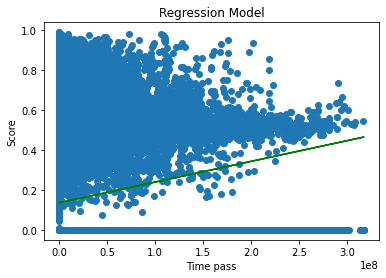

In [91]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(t2,t1)
ypredict=lin_reg.predict(t2)

plt.scatter(t2,t1)
plt.plot(t2,lin_reg.predict(t2),color='green')
plt.title("Regression Model")
plt.xlabel("Time pass")
plt.ylabel("Score")
#bella schifezza

In [92]:
print('linear regression coefficient=', lin_reg.coef_[0])
print('linear regression intercept=', lin_reg.intercept_)

linear regression coefficient= 1.0364056243891941e-09
linear regression intercept= 0.1364037146633562


In [93]:
from sklearn.metrics import mean_squared_error,r2_score,explained_variance_score
print ("Coefficient of determination :",r2_score(t1,ypredict))
print ("MSE: ",mean_squared_error(t1,ypredict))
print("RMSE: ",np.sqrt(mean_squared_error(t1,ypredict)))
#i commenti li farò meglio a dataset completo

Coefficient of determination : 0.006106878828408102
MSE:  0.05365868787452509
RMSE:  0.2316434498847854


The value 𝑏₀ = 0.14 (approximately) illustrates that the model predicts the response 0.14 when 𝑥 (time that pass) is zero. The value 𝑏₁ = 1.2e-09 means that the predicted response rises by 𝑏₁ when 𝑥 is increased by one (in this case: the time increases of one "what??.

### Is there any change in the relationship of the variables mentioned in the previous literal if you include whether an application is recommended or not in the review? Use an appropriate statistical test or technique and support your choice.

### What are histograms, bar plots, scatterplots and pie charts used for?

A histogram is visula representation of the distribution of numerical data usually grouped in bins which a non 
overlapped series of intervals.
A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights 
or lengths proportional to the values that they represent.
A scatter plot uses dots to represent values for two different numeric variables expressing the relationship that 
occurs between the two variables.
A pie chart is a circular graphic method which is used to illustrate numerical proportion into a group of variables.


### What insights can you extract from a Box Plot?

The box-plot is a graphical representation that can be used to describe the distribution of data through 5 indices: the minimum, the maximum, the median (quantile lev=0.5) and the first and third quartiles.
The "box" is delimited by the first and third quartiles (so the height is the interquantile difference IQR = q3-q1)and divided inside by the median. The "whiskers" are delimited by the minimum and maximum of the values. In this way the data is divided into four intervals with the same number of elements and this shows, for example, if the distribution is symmetric or not. Data that does not fit into the "whiskers" are called outliers, they are defined as outside the interval [-IQR,+IQR].

# Bonus points

In [ ]:
'''
For this homework, you are required to work with all data in the steam_reviews.csv. An extension (two files) 
of the dataset is available in the next links:

a. File 1 to be downloaded from https://sapienza2021adm.s3.eu-south-1.amazonaws.com/steam_reviews_bonus_1.zip.

b. File 2 to be downloaded from https://sapienza2021adm.s3.eu-south-1.amazonaws.com/steam_reviews_bonus_2.zip.

It is not necessary to use the extension for this homework, however, if you decide to use it, we will take it into
account in the final evaluation. In summary, to get the bonus points you are required to work with
[steam_reviews.csv + two files of extension] all together.
''';


# Theoretical Questions

# TQ1

In [ ]:
'''
We are given the following algorithm.

Input: 
    A: array of length n
    k: integers between 1 and n
    
function alg(A, k):
  s <-- a random element of A
  set L = [all the elements of A with value <= s]
  set R = [all the elements of A with value > s]
  r = len(L)
  if k == r:
    return s
  else if k < r:  
    return alg(L, k)
  else:
    return alg(R, k - r)
''';
import random
#IMPLEMENTATION
'''
def alg(A, k):
    #s= a random element of A
    s=random.choice(A)
    print(s)
    L = [x for x in A if x<=s]
    print('L=',L)
    R = [x for x in A if x>s]
    print('R=',R)
    lung = len(L)
    if k == lung:
        return s
    elif k < lung:  
        return alg(L, k)
    else:
        return alg(R, k - lung)
    
alg(A,k)
''';

### What does the algorithm compute?

The algorith find the k smallest element in the Array.

### What is asymptotically (i.e., we are asking for big-O complexity) the running time of the algorithm in the worst case, as a function of n?

In [ ]:
The worst case occurs when s=min(A)  and k=len(A).
In this situation: $$\begin{align}T(n) &= n + T(n-1)\\&= n + (n-1) + T(n-2)\\&= ...\\&=   \sum_{i=0}^{n}n-i\\&= (\sum_in + \sum_i i)\\&= ...\\&= n^2 - n\\&=O(n^2) \end{align}$$

There are degenerate cases where we can not guarantees the convergence of the algorithm:
$$ \begin{itemize}
    \ K=0
    \ s=max(A): the probability is almost 0, but we can not exclude this behaviour
    \ the element we are looking is repeated in the array
\end{itemize} $$

In [ ]:
### What is asymptotically the running time of the algorithm in the best case?

The best case occurs for k=len(L) and the running time is $$ T(n)=1+n+1+1= O(n) $$

The medium running time is $$ O(n) $$

# TQ2

In [ ]:
'''
You are given the recursive function splitSwap, which accepts an array a, an index i, and a length n.

function splitSwap(a, l, n):
  if n <= 1:
    return
  splitSwap(a, l, n/2)
  splitSwap(a, l+ n /2, n/2)
  swapList(a, l, n)
  
The subroutine swapList is described here:

function swapList(a, l, n):
  for i = 0 to n/2:
    tmp = a[l + i]
    a[l + i] = a[l + n/2 + i]
    a[l + n/2 + i] = tmp
'''
#IMPLEMENTATION


def splitSwap(a, l, n, lvl=0):
    if n <= 1:
        return
    indent = '\t'*lvl
    print(f"{indent}entered at lvl {lvl} with a: {a}\n")
    splitSwap(a, l, n//2, lvl+1)
    splitSwap(a, l+ n//2, n//2, lvl+1)
    print(f"{indent}* a pre_swap: {a}")
    swapList(a, l, n)
    print(f"{indent}* a after_swap: {a}\n\n")

def swapList(a, l, n):
    for i in range(n//2):
        tmp = a[l + i]
        a[l + i] = a[l + n//2 + i]
        a[l + n//2 + i] = tmp
    
splitSwap([i for i in range(1,9)], 0, 8)




### How much running time does it take to execute splitSwap(a, 0, n)? (We want a Big O analysis.)

In [ ]:
# Alessandro ha il codice latex

### What does this algorithm do? Is it optimal? Describe the mechanism of the algorithm in details, we do not want to know only its final result. HINT: Consider the scenario where len(a) and n are numbers that are a power of 2.

In [ ]:
The algorith reverse the subarray starting from the index i untill i+n : as the implementation shows, in every
level we swap a subarray of dimension 2^(log2(n)-1-level).
The algorith is not optimal since we can solve the same problem with an algorith with O(n)=n.
For example we can consider another array B in which we store the elements of the Array A from the index l+n untill l 
( step=-1) and then we could copy the elements of B in the positions l untill l+n of A


In [ ]:
def another_algorith(A,l,n):
    B=[]
    for i in range(l+n,l,-1):
        B.append(A[i])
    for i in range(l,l+n):
        A[i]=B[i-l]
        

# TQ3

In [ ]:
'''
In the knapsack problem we are given n objects and each object i has a weight w_i and a value v_i.
We are also given a weight budget W. The problem is to select a set of objects with total weight bounded by W 
that maximized the sum of their values. The following are three natural heuristics:

*Order them in increasing order of weight and then visit them sequentially, adding them to the solution 
as long as the budget is not exceeded

*Order them in decreasing order of values, and then visit them sequentially, adding them to the solution 
if the budget is not exceeded

*Order them in decreasing relative value (v_i / w_i), and then visit them sequentially, adding them to the 
solution if the budget is not exceeded
''';

### For each of the heuristics, provide a counterexample, that is, an example of a problem instance in which the heuristic fails to provide the optimal solution.

### First 

Suppose the existence of two elements A={p=2,v=2}, B={p=1,v=0} and set the weight budget=W=2.
If we order the objects in increasing order of weight and then visit them sequentially, adding them to the solution
as long as the budget is not exceeded , we will find {B} with a total value of 0.
This is not an optimal solution since the solution given by {A} respects the weight costraint 
and has a total value of 2.

### Second

Suppose the existence of three elements A={v=3,p=3},B={v=2,p=1},C={p=1,v=2} and set the weight budget=3.
If we order them in decreasing order of values, and then visit them sequentially, adding them to the 
solution if the budget is not exceeded, we will find {A} with a total value of 3.
This is not an optimal solution since the solution given by {B,C} has a total weight of 2 and a total value of 4.


### Third

Suppose the existence of two elements A={v=2,p=1,v/p=2}, B={v=3,p=3,v/p=1} and set the weight budget=3.
If we order them in decreasing relative value (v_i / w_i), and then visit them sequentially, adding them
to the solution if the budget is not exceeded, we will find {A} with a total value of 2.
This is not an optimal solution since the solution given by {B} respects the weight costraint 
and has a total value of 3.